In [38]:
!python -m pip install imbalanced-learn xgboost tensorflow_addons skopt

ERROR: Could not find a version that satisfies the requirement skopt (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for skopt


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import imblearn


In [2]:
df1 = pd.read_csv("dataSynthetic.csv")
df1

,Timestamp,Pod Name,CPU Usage (%),Memory Usage (%),Pod Status,Pod Reason,Pod Restarts,Ready Containers,Total Containers,Pod Event Type,...,Network Receive Packets (p/s),Network Transmit Packets (p/s),Network Receive Packets Dropped (p/s),Network Transmit Packets Dropped (p/s),FS Reads Total (MB),FS Writes Total (MB),FS Reads/Writes Total (MB),FS Reads Bytes Total (MB),FS Writes Bytes Total (MB),FS Reads/Writes Bytes Total (MB)
0,2024-04-19 21:05:48,opentelemetry-demo-redis-68779558bb-4mjtr,0.230313,53.101612,Running,NaN,0,1,1,No recent events,...,3.768307,1.135357,2.153989,1.185063,0.000485,0.001514,0.001785,0.000310,0.000000,0.000331
1,2024-04-19 20:58:41,opentelemetry-demo-frontend-76f486559f-szlsh,14.612577,0.141409,Running,NaN,2,1,1,Normal,...,156.855681,356.949251,1.460284,10.050480,0.001362,0.000666,0.001240,0.000049,0.000000,0.000000
2,2024-04-18 22:13:38,opentelemetry-demo-frauddetectionservice-64cb6...,0.603365,12.191371,Running,NaN,0,1,1,Normal,...,4.474349,3.042058,3.968989,4.581325,0.001177,0.328530,0.357402,0.000326,0.003142,0.003002
3,2024-04-22 12:30:14,opentelemetry-demo-frauddetectionservice-64cb6...,0.077004,0.201204,Unknown,NaN,0,0,0,No recent events,...,1.393119,1.345098,0.861935,5.033863,0.000000,0.000771,0.000000,0.000396,0.000000,0.000205
4,2024-04-22 15:54:45,opentelemetry-demo-recommendationservice-7697d...,1.060736,43.678164,Running,NaN,0,1,1,No recent events,...,0.050636,0.094615,2.542782,7.614585,0.000000,0.001226,0.000493,0.000000,0.000279,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2024-04-18 21:34:18,opentelemetry-demo-frontendproxy-588c77dd7c-l4wcd,3.726941,0.276247,Running,NaN,0,1,1,Normal,...,1034.910577,480.307024,12.942186,6.872772,0.001660,0.002174,0.001344,0.000976,0.000553,0.000000
99996,2024-04-18 15:32:45,opentelemetry-demo-emailservice-dd9b599db-hctwt,0.012213,4.863887,Running,NaN,0,1,1,Normal,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000220,0.001230,0.000261,0.000000,0.000530
99997,2024-04-18 15:57:40,opentelemetry-demo-shippingservice-86ccddbd5b-...,0.009438,0.983323,Running,NaN,0,1,1,Normal,...,0.022866,0.007754,0.000000,0.011464,0.000000,0.001411,0.000000,0.001104,0.000000,0.000000
99998,2024-04-22 11:01:44,opentelemetry-demo-shippingservice-86ccddbd5b-...,0.009156,60.118184,Running,NaN,0,1,1,No recent events,...,0.033960,0.025412,0.000000,0.030217,0.000028,0.001853,0.000000,0.000162,0.000000,0.000000


In [3]:
df1.describe()

,CPU Usage (%),Memory Usage (%),Pod Reason,Pod Restarts,Ready Containers,Total Containers,Memory Usage (MB),Active Memory Requests (MB),Memory Requests (%),Active Memory Limits (MB)emory Limits Utilization (%),...,Network Receive Packets (p/s),Network Transmit Packets (p/s),Network Receive Packets Dropped (p/s),Network Transmit Packets Dropped (p/s),FS Reads Total (MB),FS Writes Total (MB),FS Reads/Writes Total (MB),FS Reads Bytes Total (MB),FS Writes Bytes Total (MB),FS Reads/Writes Bytes Total (MB)
count,100000.000000,100000.000000,0.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.034169,22.869531,NaN,21.942090,0.771400,0.895710,60.031106,178.013580,37.091803,183.829260,...,45.713693,49.507379,3.332648,3.983456,0.000729,0.265797,0.254580,0.000385,0.002177,0.002021
std,2.869768,27.360869,NaN,83.909897,0.419933,0.305638,132.194018,201.156394,23.399689,210.996156,...,142.336492,146.587938,3.127009,3.702508,0.001662,1.559981,1.426386,0.000645,0.014807,0.013007
min,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.144531,20.000000,0.201172,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.011043,0.550927,NaN,0.000000,1.000000,1.000000,8.419745,20.000000,12.482931,20.000000,...,0.201610,0.195265,1.110873,1.022626,0.000000,0.000146,0.000000,0.000000,0.000000,0.000000
50%,0.095716,10.084737,NaN,0.000000,1.000000,1.000000,19.769224,101.000000,41.187186,100.000000,...,1.503957,1.510470,2.637999,3.149418,0.000000,0.000849,0.000176,0.000170,0.000000,0.000000
75%,0.641537,43.178285,NaN,0.000000,1.000000,1.000000,44.393181,202.000000,49.695805,205.000000,...,13.394122,12.804488,4.438617,6.304559,0.000721,0.001691,0.001497,0.000520,0.000013,0.000541
max,30.030964,99.550781,NaN,370.000000,1.000000,1.000000,1598.730469,1024.000000,120.996284,1024.000000,...,1265.593750,1221.937500,19.195911,19.993269,0.009646,20.192395,20.681330,0.005269,0.185348,0.169303


In [4]:
df1.columns

Index(['Timestamp', 'Pod Name', 'CPU Usage (%)', 'Memory Usage (%)',
       'Pod Status', 'Pod Reason', 'Pod Restarts', 'Ready Containers',
       'Total Containers', 'Pod Event Type', 'Pod Event Reason',
       'Pod Event Age', 'Pod Event Source', 'Pod Event Message', 'Node Name',
       'Event Reason', 'Event Age', 'Event Source', 'Event Message',
       'Memory Usage (MB)', 'Active Memory Requests (MB)',
       'Memory Requests (%)',
       'Active Memory Limits (MB)emory Limits Utilization (%)',
       'Memory Usage (MB).1', 'Memory Usage (Cache) (MB)',
       'Memory Usage (Swap) (MB)', 'Network Receive Bytes',
       'Network Transmit Bytes', 'Network Receive Packets (p/s)',
       'Network Transmit Packets (p/s)',
       'Network Receive Packets Dropped (p/s)',
       'Network Transmit Packets Dropped (p/s)', 'FS Reads Total (MB)',
       'FS Writes Total (MB)', 'FS Reads/Writes Total (MB)',
       'FS Reads Bytes Total (MB)', 'FS Writes Bytes Total (MB)',
       'FS Reads/Write

In [5]:
df1 = df1.drop(['Pod Name' ,'Pod Event Source' , 'Pod Event Message' ,'Pod Reason','Event Reason','Node Name','Event Source' , 'Ready Containers', 'Total Containers' ],axis = 1)

In [6]:
df1 = df1.drop (['Pod Event Age','Event Message','Pod Event Reason','Pod Event Type' ] , axis = 1)

C:\Users\hp\AppData\Local\Temp\ipykernel_19948\997734436.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df1.corr(), annot=True)


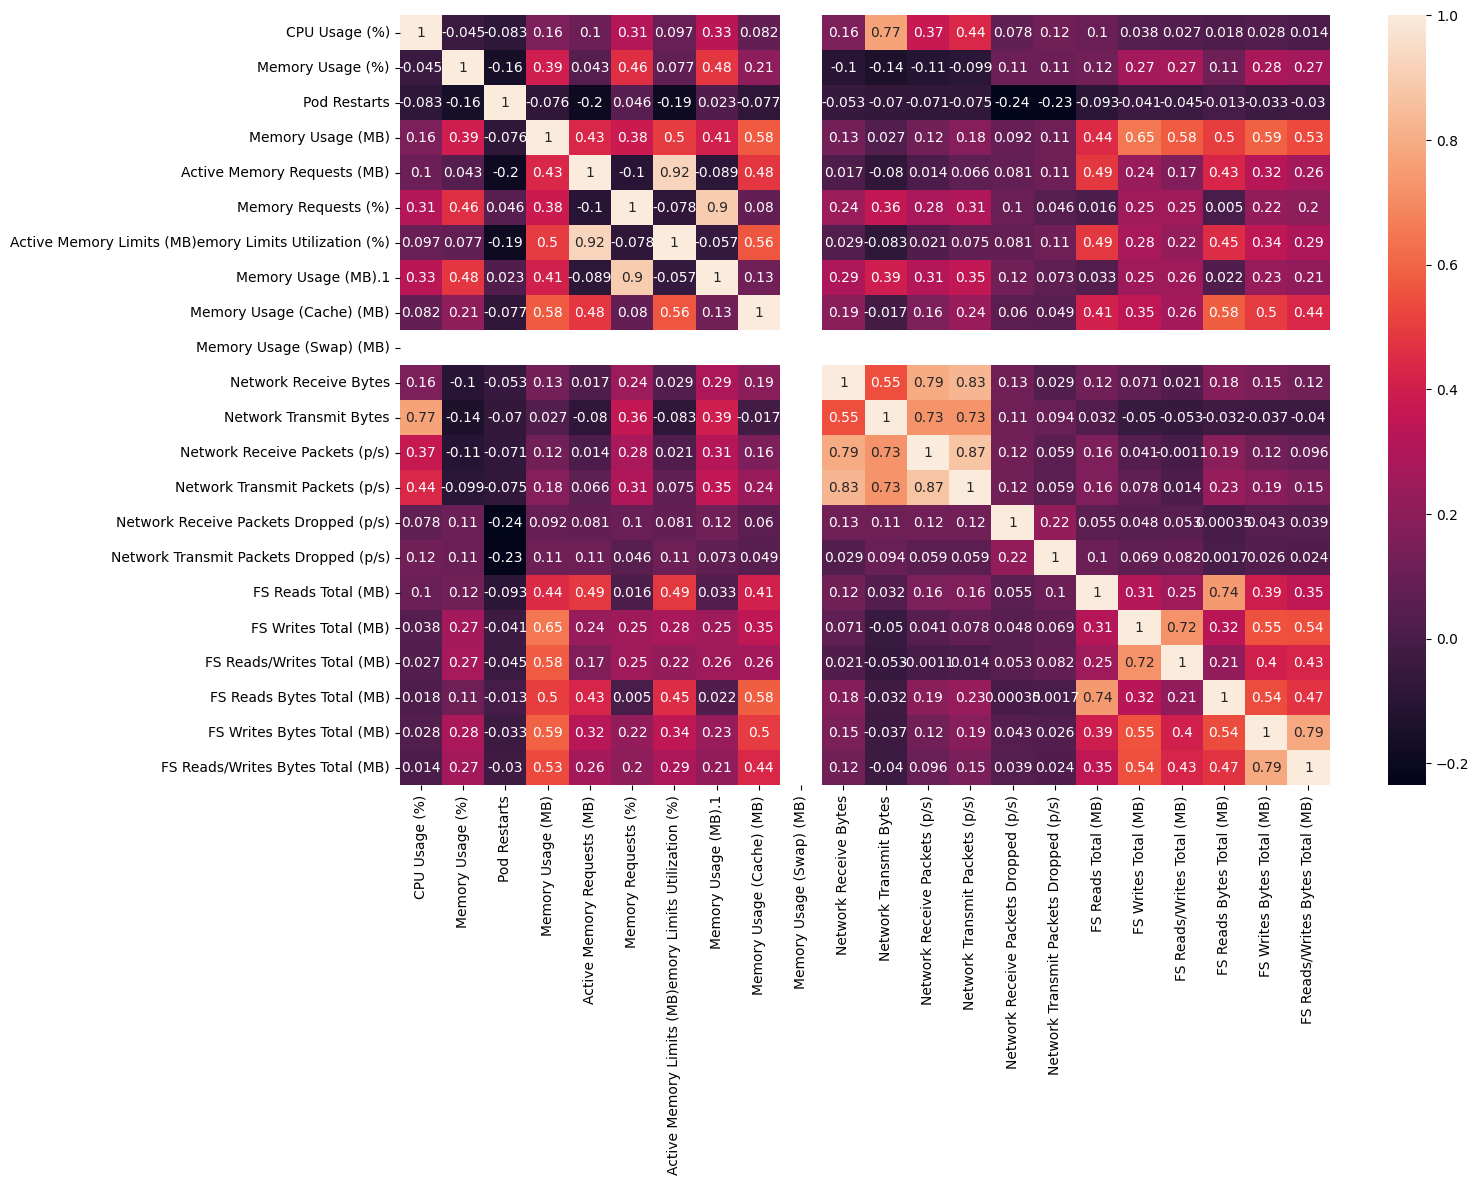

In [7]:
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(df1.corr(), annot=True)
plt.show()

In [8]:
status_encoded = pd.get_dummies(df1['Pod Status'], prefix='Status')
status_encoded

,Status_ContainerCreating,Status_CrashLoopBackOff,Status_Error,Status_NotFound,Status_Pending,Status_Running,Status_Unknown
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
99995,0,0,0,0,0,1,0
99996,0,0,0,0,0,1,0
99997,0,0,0,0,0,1,0
99998,0,0,0,0,0,1,0


In [ ]:
df1 = pd.concat([df1 , status_encoded] ,axis=1)
df1 = df1.drop(['Pod Status'],axis=1)

In [10]:

df1.head()

,Timestamp,CPU Usage (%),Memory Usage (%),Pod Restarts,Event Age,Memory Usage (MB),Active Memory Requests (MB),Memory Requests (%),Active Memory Limits (MB)emory Limits Utilization (%),Memory Usage (MB).1,...,FS Reads Bytes Total (MB),FS Writes Bytes Total (MB),FS Reads/Writes Bytes Total (MB),Status_ContainerCreating,Status_CrashLoopBackOff,Status_Error,Status_NotFound,Status_Pending,Status_Running,Status_Unknown
0,2024-04-19 21:05:48,0.230313,53.101612,0,0:24:58,16.252830,20.0,41.628881,20.0,41.135242,...,0.000310,0.000000,0.000331,0,0,0,0,0,1,0
1,2024-04-19 20:58:41,14.612577,0.141409,2,0:42:59,99.092547,200.0,62.834727,198.0,67.486296,...,0.000049,0.000000,0.000000,0,0,0,0,0,1,0
2,2024-04-18 22:13:38,0.603365,12.191371,0,0:15:22,212.860982,197.0,81.391030,203.0,68.315419,...,0.000326,0.003142,0.003002,0,0,0,0,0,1,0
3,2024-04-22 12:30:14,0.077004,0.201204,0,0:11:04,0.274454,201.0,0.201172,201.0,0.201172,...,0.000396,0.000000,0.000205,0,0,0,0,0,0,1
4,2024-04-22 15:54:45,1.060736,43.678164,0,1:03:59,63.272532,20.0,48.271191,20.0,48.882971,...,0.000000,0.000279,0.000000,0,0,0,0,0,1,0


In [11]:
df1["EventAgeSeconds"] = df1["Event Age"].apply(lambda x: sum(int(t) * 60**i for i, t in enumerate(reversed(x.split(":")))))


In [12]:
df1.drop(['Timestamp' , 'Event Age'] , axis=1)

,CPU Usage (%),Memory Usage (%),Pod Restarts,Memory Usage (MB),Active Memory Requests (MB),Memory Requests (%),Active Memory Limits (MB)emory Limits Utilization (%),Memory Usage (MB).1,Memory Usage (Cache) (MB),Memory Usage (Swap) (MB),...,FS Writes Bytes Total (MB),FS Reads/Writes Bytes Total (MB),Status_ContainerCreating,Status_CrashLoopBackOff,Status_Error,Status_NotFound,Status_Pending,Status_Running,Status_Unknown,EventAgeSeconds
0,0.230313,53.101612,0,16.252830,20.0,41.628881,20.0,41.135242,0.051951,0.0,...,0.000000,0.000331,0,0,0,0,0,1,0,1498
1,14.612577,0.141409,2,99.092547,200.0,62.834727,198.0,67.486296,29.896461,0.0,...,0.000000,0.000000,0,0,0,0,0,1,0,2579
2,0.603365,12.191371,0,212.860982,197.0,81.391030,203.0,68.315419,0.185816,0.0,...,0.003142,0.003002,0,0,0,0,0,1,0,922
3,0.077004,0.201204,0,0.274454,201.0,0.201172,201.0,0.201172,0.030235,0.0,...,0.000000,0.000205,0,0,0,0,0,0,1,664
4,1.060736,43.678164,0,63.272532,20.0,48.271191,20.0,48.882971,1.935004,0.0,...,0.000279,0.000000,0,0,0,0,0,1,0,3839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3.726941,0.276247,0,32.598294,50.0,65.916575,50.0,60.435990,5.070399,0.0,...,0.000553,0.000000,0,0,0,0,0,1,0,513
99996,0.012213,4.863887,0,32.503458,99.0,36.286872,99.0,35.729295,0.396256,0.0,...,0.000000,0.000530,0,0,0,0,0,1,0,1249
99997,0.009438,0.983323,0,0.335187,20.0,4.066920,20.0,3.881297,0.043978,0.0,...,0.000000,0.000000,0,0,0,0,0,1,0,1249
99998,0.009156,60.118184,0,6.617011,20.0,48.722497,40.0,49.360736,0.008776,0.0,...,0.000000,0.000000,0,0,0,0,0,1,0,1249


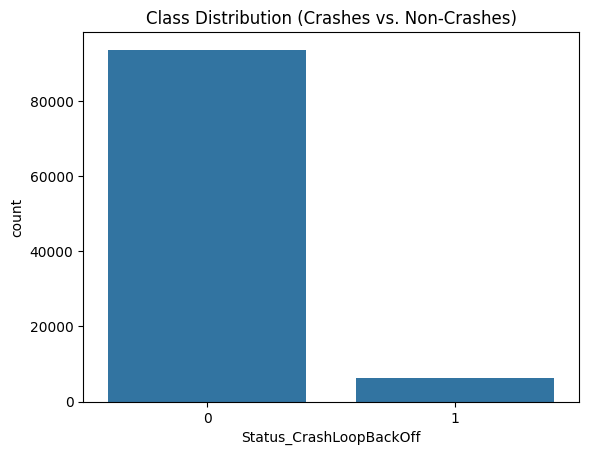

In [13]:
sns.countplot(x='Status_CrashLoopBackOff', data=df1)
plt.title("Class Distribution (Crashes vs. Non-Crashes)")
plt.show()

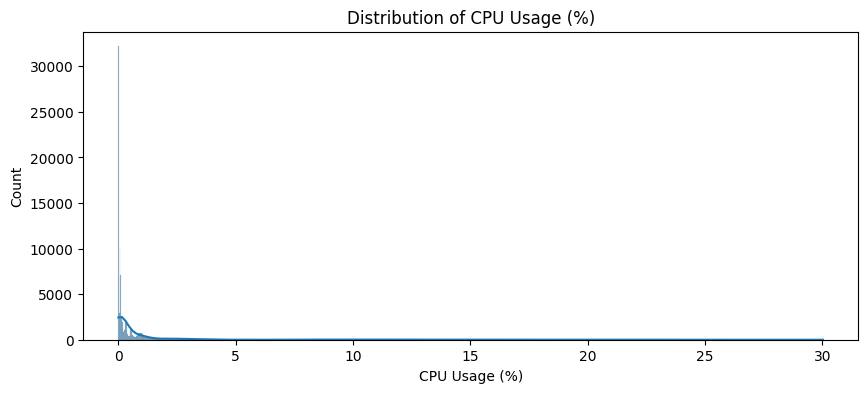

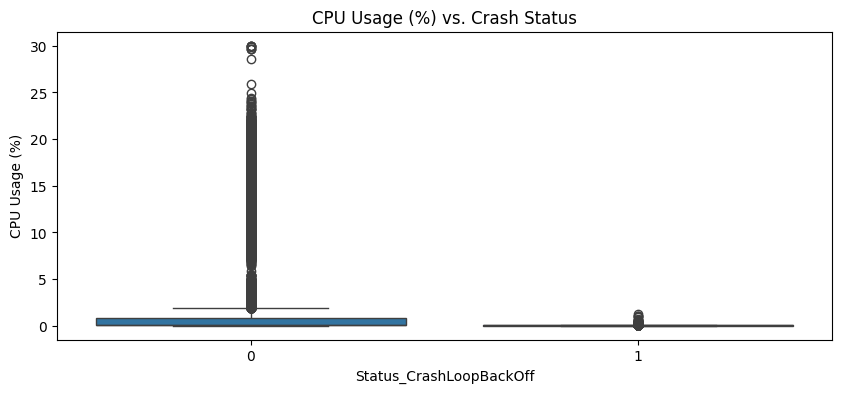

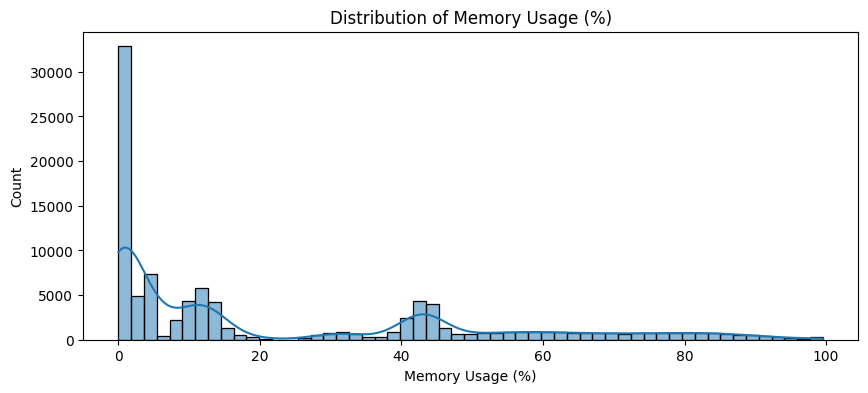

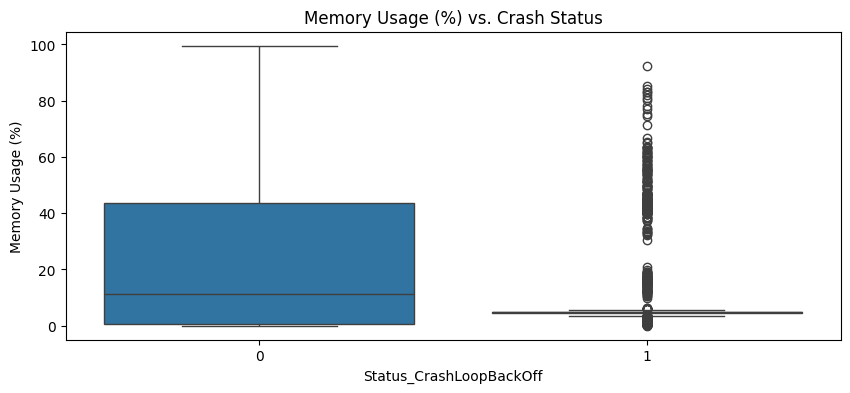

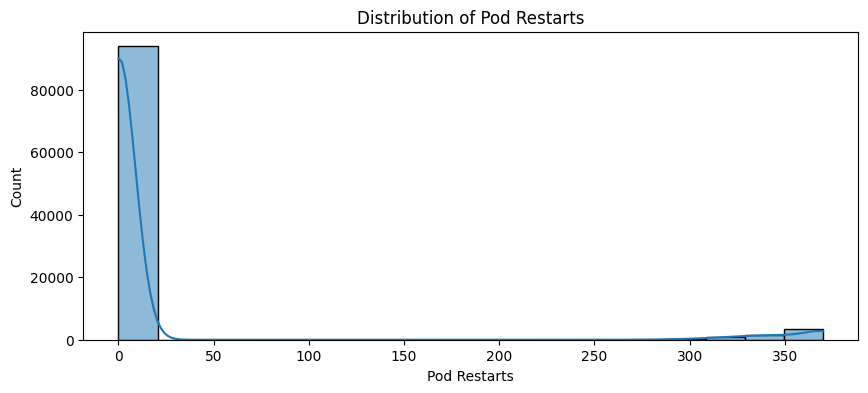

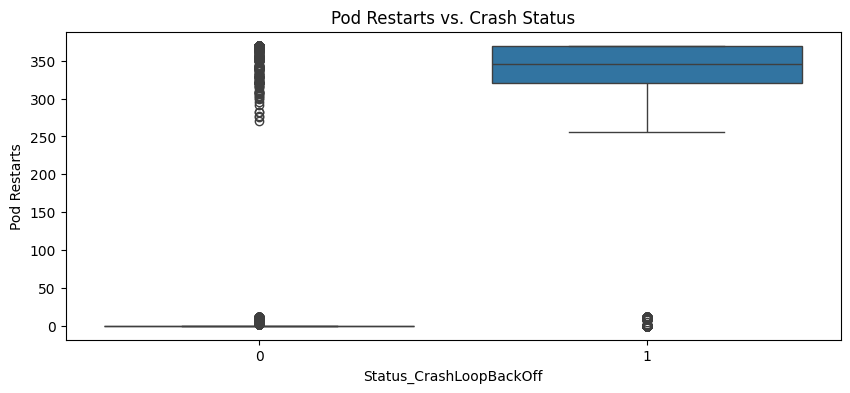

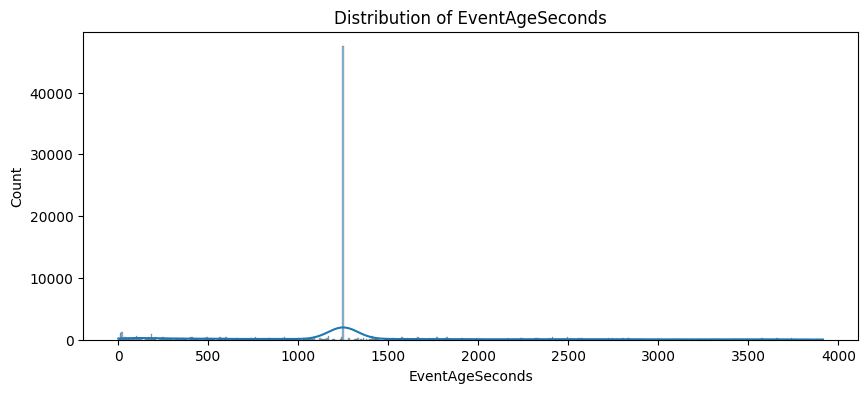

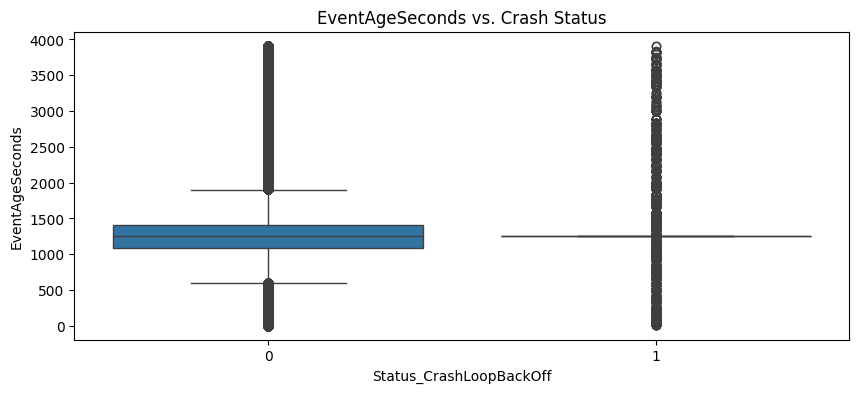

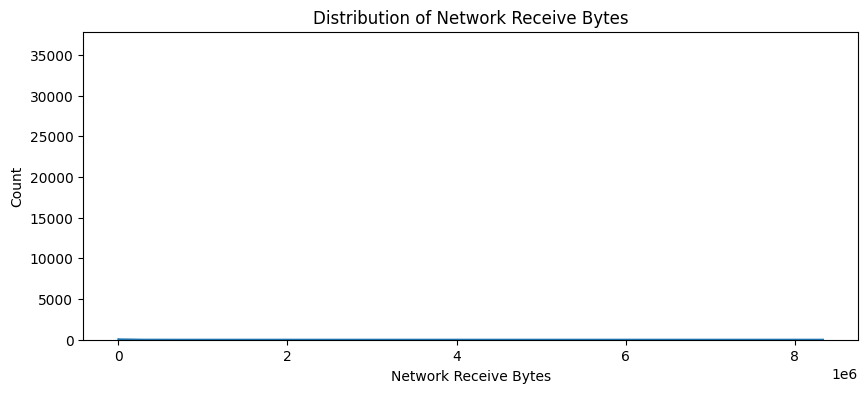

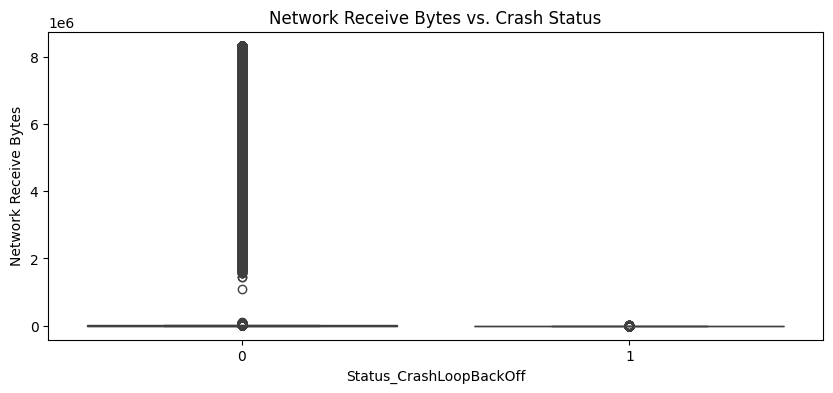

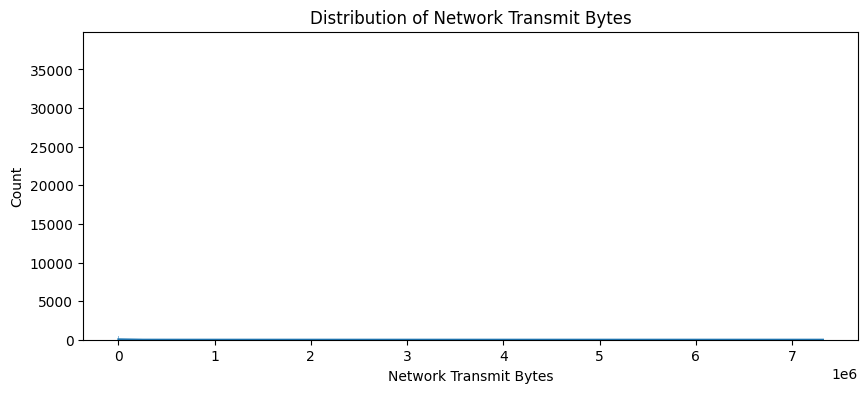

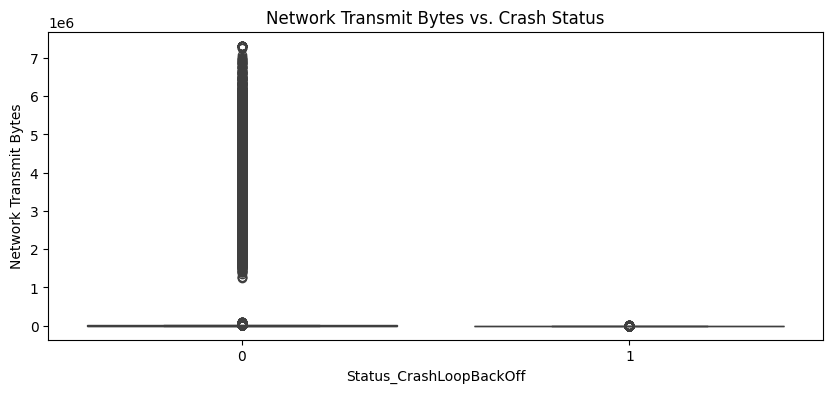

In [14]:

numerical_cols = [
    'CPU Usage (%)', 
    'Memory Usage (%)', 
    'Pod Restarts', 
    'EventAgeSeconds', 
    'Network Receive Bytes', 
    'Network Transmit Bytes'
]

for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df1[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
    
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='Status_CrashLoopBackOff', y=col, data=df1)
    plt.title(f"{col} vs. Crash Status")
    plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_12664\2172649827.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


<Axes: >

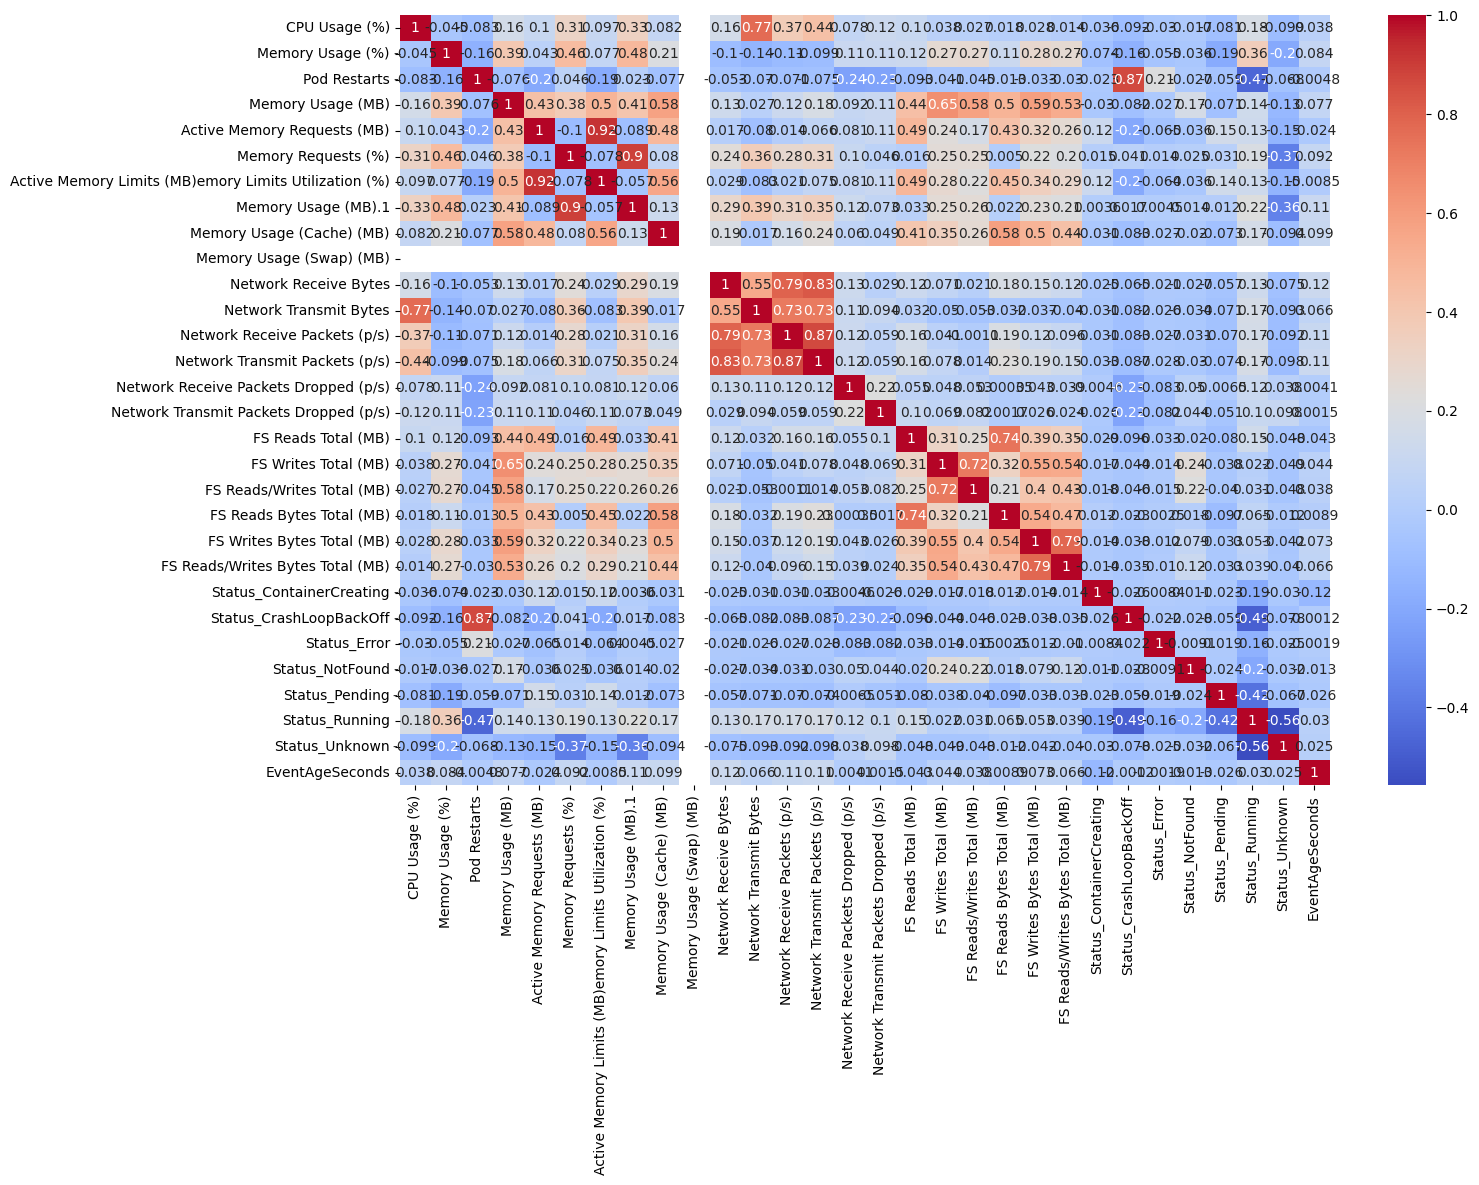

In [15]:
df1["HighCPU"] = (df1["CPU Usage (%)"] > 80).astype(int)  
df1["FrequentRestarter"] = (df1["Pod Restarts"] > 10).astype(int)  
df1["MemoryStress"] = (df1["Memory Usage (%)"] * df1["CPU Usage (%)"])
df1.head()

,Timestamp,CPU Usage (%),Memory Usage (%),Pod Restarts,Event Age,Memory Usage (MB),Active Memory Requests (MB),Memory Requests (%),Active Memory Limits (MB)emory Limits Utilization (%),Memory Usage (MB).1,...,Status_CrashLoopBackOff,Status_Error,Status_NotFound,Status_Pending,Status_Running,Status_Unknown,EventAgeSeconds,HighCPU,FrequentRestarter,MemoryStress
0,2024-04-19 21:05:48,0.230313,53.101612,0,0:24:58,16.252830,20.0,41.628881,20.0,41.135242,...,0,0,0,0,1,0,1498,0,0,12.229965
1,2024-04-19 20:58:41,14.612577,0.141409,2,0:42:59,99.092547,200.0,62.834727,198.0,67.486296,...,0,0,0,0,1,0,2579,0,0,2.066357
2,2024-04-18 22:13:38,0.603365,12.191371,0,0:15:22,212.860982,197.0,81.391030,203.0,68.315419,...,0,0,0,0,1,0,922,0,0,7.355846
3,2024-04-22 12:30:14,0.077004,0.201204,0,0:11:04,0.274454,201.0,0.201172,201.0,0.201172,...,0,0,0,0,0,1,664,0,0,0.015494
4,2024-04-22 15:54:45,1.060736,43.678164,0,1:03:59,63.272532,20.0,48.271191,20.0,48.882971,...,0,0,0,0,1,0,3839,0,0,46.330997


In [16]:
print(df1["Status_CrashLoopBackOff"].value_counts(normalize=True))  

0    0.93646
1    0.06354
Name: Status_CrashLoopBackOff, dtype: float64


In [17]:
df1 = df1.drop(columns=["Timestamp","FrequentRestarter", "HighCPU", 
    "Network Receive Bytes", "Network Transmit Bytes",
    "FS Reads Total (MB)", "FS Writes Total (MB)",
    "Status_ContainerCreating", "Status_Unknown"])

In [18]:
df1.head().to_csv("dataProcessed2.csv")

In [19]:
df1["CPUMemoryStress"] = df1["CPU Usage (%)"] * df1["Memory Usage (%)"]
# Time-based urgency (inverse of event age)
df1["EventUrgency"] = 1 / (df1["EventAgeSeconds"] + 1e-6)  # Avoid division by zero

In [21]:
features = [  
    "Pod Restarts",  
    "CPU Usage (%)",  
    "Memory Usage (%)",  
    "MemoryStress",
      
]  

# Update DataFrame  
X = df1[features]  
y = df1["Status_CrashLoopBackOff"]  

In [22]:
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split  

# Apply SMOTE to balance classes  
smote = SMOTE(random_state=42)  
X_res, y_res = smote.fit_resample(X, y)  

# Split data (stratified to preserve balance)  
X_train, X_test, y_train, y_test = train_test_split(  
    X_res, y_res, test_size=0.2, stratify=y_res, random_state=42  
)  

# XGBoost


In [23]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
model = XGBClassifier(  
    scale_pos_weight=15,  
    objective="binary:logistic",  
    eval_metric="aucpr",  # Optimize for precision-recall  
    max_depth=3,          # Prevent overfitting  
    subsample=0.8,        # Stochastic sampling  
    n_estimators=200  
)  
model.fit(X_train, y_train)  

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94     18730
           1       0.91      1.00      0.95     18729

    accuracy                           0.95     37459
   macro avg       0.95      0.95      0.95     37459
weighted avg       0.95      0.95      0.95     37459



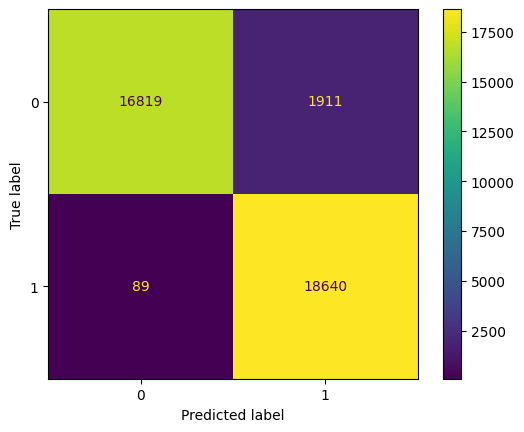

In [24]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay  

# Predictions  
y_pred = model.predict(X_test)  

# Metrics  
print("Classification Report:\n", classification_report(y_test, y_pred))  
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)  

In [25]:
import matplotlib.pyplot as plt  
from sklearn.metrics import precision_recall_curve  

# Get predicted probabilities  
y_proba = model.predict_proba(X_test)[:, 1]  

# Find threshold for 90% recall  
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)  
# best_threshold = thresholds[recalls >= 0.9][-1]  
best_threshold = thresholds[np.where(recalls >= 0.9)[0][-1]]

print(thresholds.shape)

# Apply custom threshold  
y_pred_adj = (y_proba >= best_threshold).astype(int)  
print("Adjusted Report:\n", classification_report(y_test, y_pred_adj))  

(10291,)
Adjusted Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     18730
           1       1.00      0.90      0.95     18729

    accuracy                           0.95     37459
   macro avg       0.95      0.95      0.95     37459
weighted avg       0.95      0.95      0.95     37459



In [28]:
import joblib
joblib.dump(model , "Crash_Prediction_XGB.h5")

['Crash_Prediction_XGB.h5']

C:\Users\hp\AppData\Local\Temp\ipykernel_19948\212382608.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


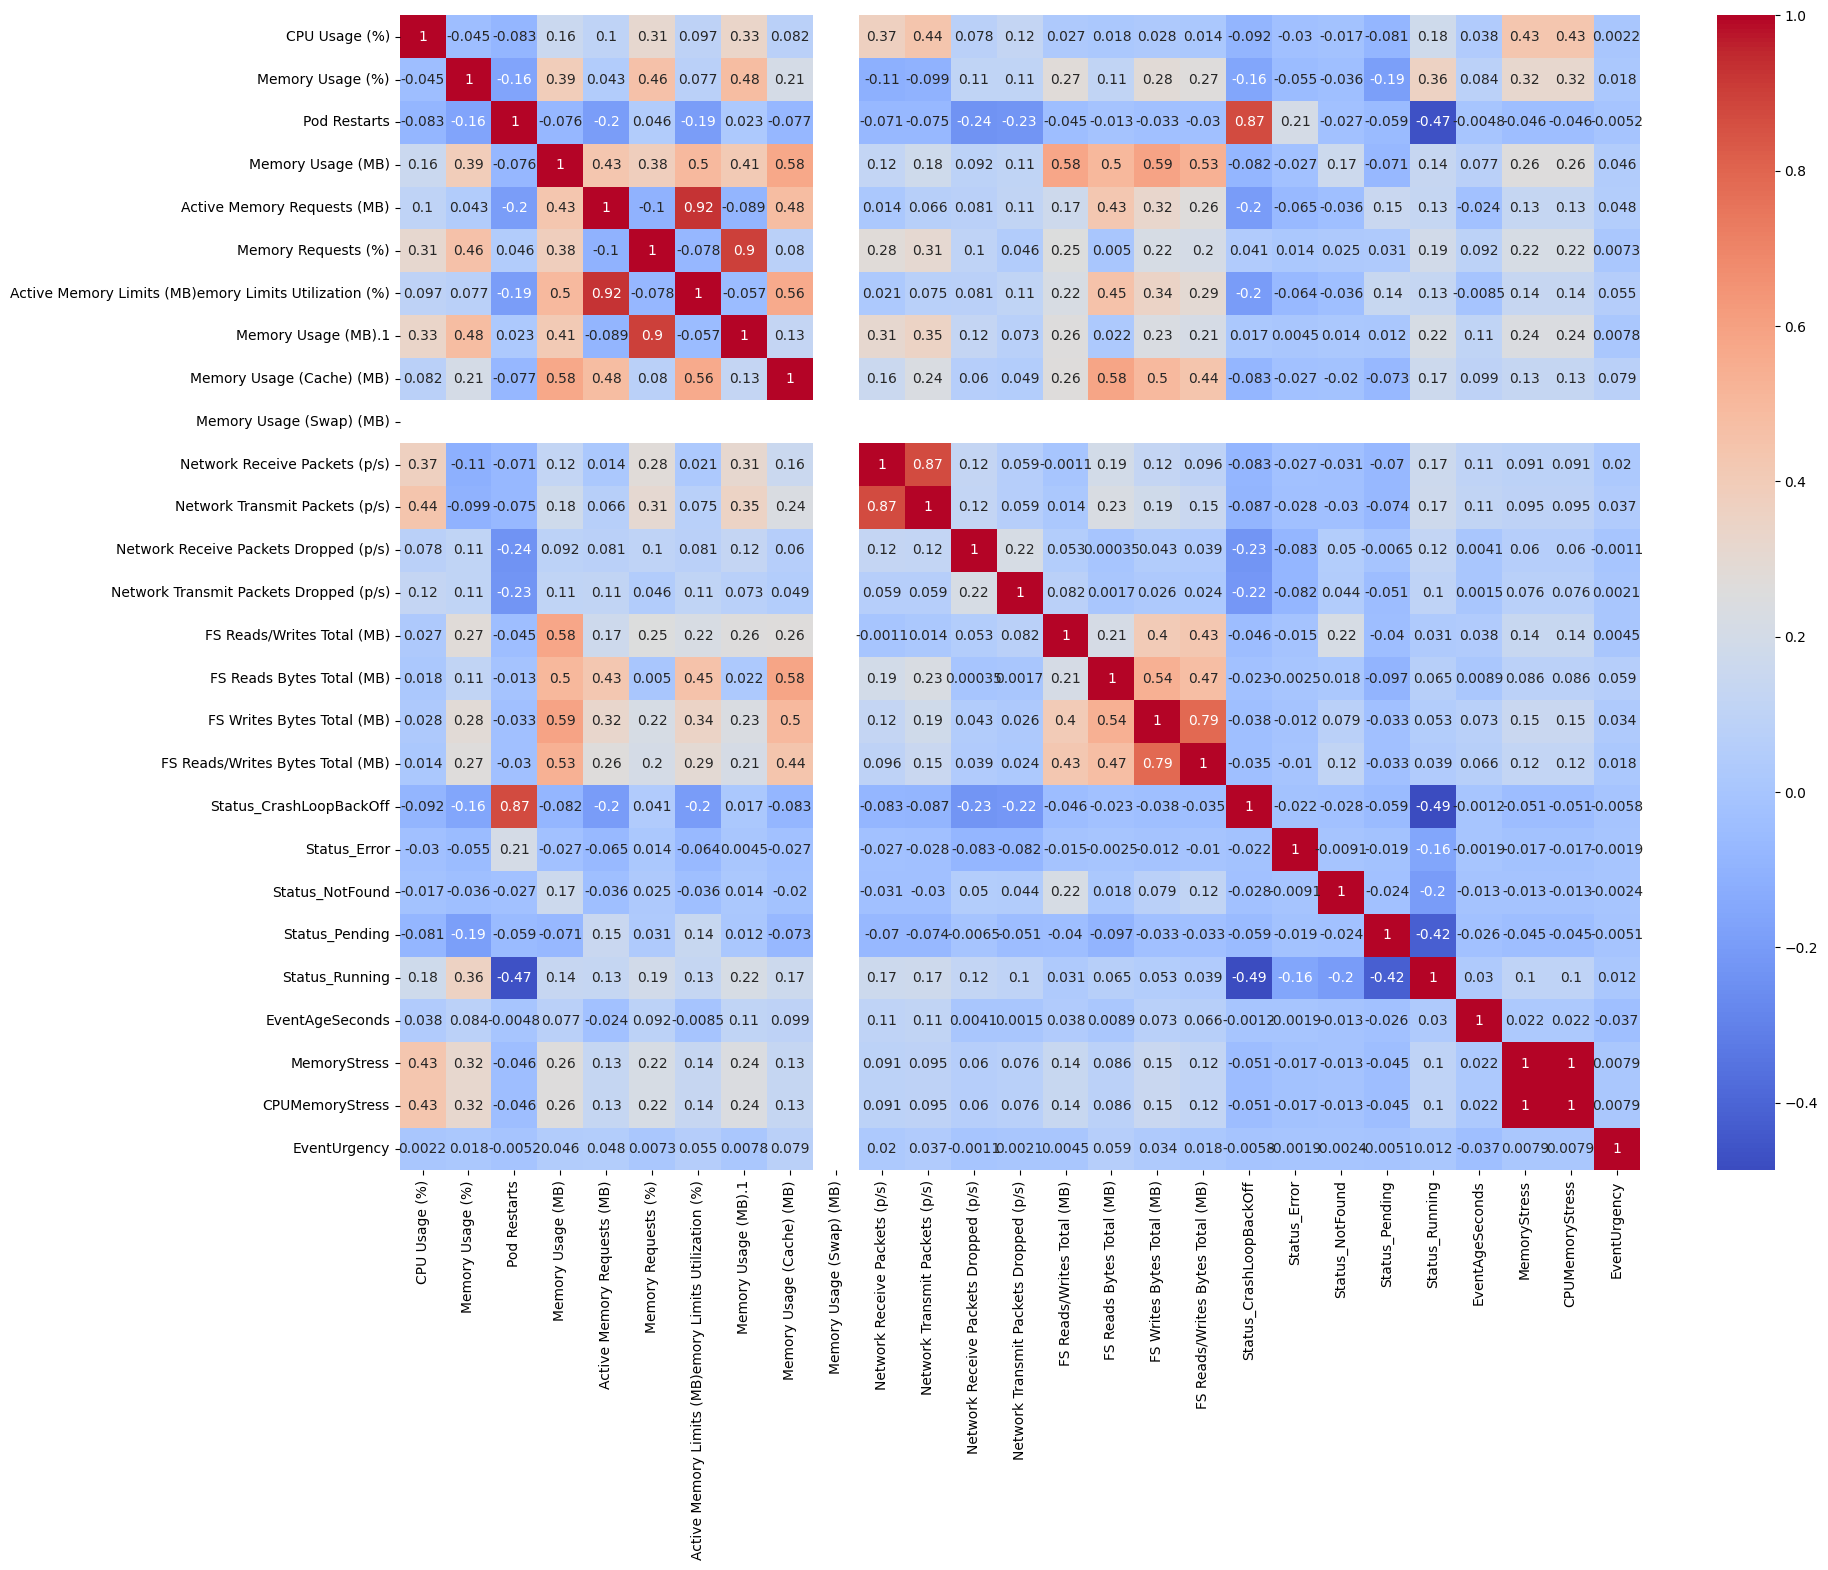

In [20]:
corr = df1.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr , annot=True , cmap="coolwarm")
plt.show()
